In [1]:
#import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задание №1


In [2]:
TrainData = pd.read_csv('data/train_86_by_71.txt',sep="\t",header = None)

In [3]:
TrainData.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,1.0,22.505,4.892,1.957,0.000,1.957,23.483,7.828,5.871,4.892,...,0.978,0.978,0.978,0.000,11.742,3.914,6.849,3.914,4.892,0.0
1,2.0,25.313,1.830,0.305,4.575,26.532,3.660,2.440,16.468,2.440,...,5.185,2.135,1.220,1.220,10.369,0.610,3.965,5.489,8.234,0.0
2,2.0,27.719,1.808,2.410,0.904,5.423,28.322,2.712,5.725,8.738,...,3.616,3.013,0.301,0.603,7.834,4.218,3.616,6.629,4.519,0.0
3,2.0,17.879,2.774,0.925,3.699,22.503,2.158,5.240,11.714,3.391,...,0.617,0.308,4.316,2.158,6.165,0.617,3.083,7.090,2.158,0.0
4,2.0,28.475,3.947,1.128,4.793,16.916,3.383,4.511,7.612,4.229,...,1.692,2.537,0.846,1.692,7.330,0.282,4.229,2.255,6.202,0.0


In [4]:
X_train, Y_train = TrainData.iloc[:, 1:].values, TrainData.iloc[:, 0].values

In [5]:
WorkModelLogisticRegression = LogisticRegression()
WorkModelLogisticRegression.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
TestData = pd.read_csv('data/valid_20_by_71.txt',sep="\t",header = None)

In [7]:
X_test, Y_test = TestData.iloc[:, 1:].values, TestData.iloc[:, 0].values

Вычислим метрики качества алгоритма

In [8]:
from sklearn import metrics
preds = WorkModelLogisticRegression.predict(X_test)
print('R2: %f' % WorkModelLogisticRegression.score(X_test,Y_test))
print('Accuracy =', metrics.accuracy_score(Y_test, preds))
print('Precision / Точность = ',metrics.precision_score(Y_test,preds))
print('Recall / Полнота = ',metrics.recall_score(Y_test,preds))
print(metrics.classification_report(Y_test, preds))
print('Матрица ошибок:')
print(metrics.confusion_matrix(Y_test,preds))

R2: 0.900000
Accuracy = 0.9
Precision / Точность =  1.0
Recall / Полнота =  0.833333333333
             precision    recall  f1-score   support

        1.0       1.00      0.83      0.91        12
        2.0       0.80      1.00      0.89         8

avg / total       0.92      0.90      0.90        20

Матрица ошибок:
[[10  2]
 [ 0  8]]


А теперь интегральные метрики модели

In [9]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test,WorkModelLogisticRegression.predict_proba(X_test)[:,-1],pos_label=1)

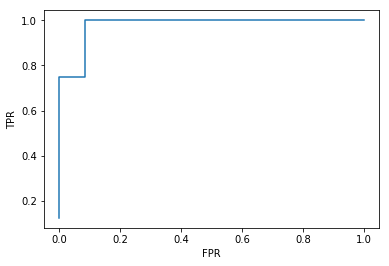

Площадь под графиком:  0.979166666667


In [10]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds  = metrics.roc_curve(Y_test,WorkModelLogisticRegression.predict_proba(X_test)[:,-1],pos_label=2)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print("Площадь под графиком: ",metrics.auc(fpr,tpr))

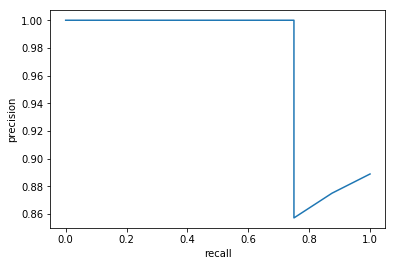

Площадь под графиком:  0.871279761905


In [11]:
precision, recall, thresholds = metrics.precision_recall_curve(Y_test,WorkModelLogisticRegression.predict_proba(X_test)[:,-1],pos_label=2)
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
t = np.array([precision,recall])
t.sort(axis=0)
print('Площадь под графиком: ', metrics.auc(t[0],t[1]))

# Задание №2

In [12]:
from sklearn import preprocessing
#normalize the data attributes
normalized_X = preprocessing.normalize(X_train)
# standardize the data attributes
standardized_X = preprocessing.scale(X_train)

In [13]:
WorkModelLogisticRegressionNorm = LogisticRegression()
WorkModelLogisticRegressionNorm.fit(normalized_X,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#print('R2: %f' % WorkModelLogisticRegressionNorm.score(X_test,Y_test))
predsNorm =  WorkModelLogisticRegressionNorm.predict(X_test)
print(metrics.classification_report(Y_test,predsNorm))

             precision    recall  f1-score   support

        1.0       0.83      0.83      0.83        12
        2.0       0.75      0.75      0.75         8

avg / total       0.80      0.80      0.80        20



In [15]:
WorkModelLogisticRegressionStand = LogisticRegression()
WorkModelLogisticRegressionStand.fit(standardized_X,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
predsStand =  WorkModelLogisticRegressionStand.predict(X_test)
print(metrics.classification_report(Y_test,predsStand))

             precision    recall  f1-score   support

        1.0       0.60      1.00      0.75        12
        2.0       0.00      0.00      0.00         8

avg / total       0.36      0.60      0.45        20



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Задание №3

In [17]:
C = [0.001,0.01,0.1,1,10,100]
for c in C:
    WorkModelLogisticRegressionC = LogisticRegression(C=c)
    WorkModelLogisticRegressionC.fit(X_train,Y_train)
    print('C = ', c, ': score = ' ,WorkModelLogisticRegressionC.score(X_test,Y_test))

C =  0.001 : score =  0.9
C =  0.01 : score =  0.9
C =  0.1 : score =  0.9
C =  1 : score =  0.9
C =  10 : score =  0.9
C =  100 : score =  0.9


In [18]:
c = 10**-10
while c < 10**11:
    WorkModelLogisticRegressionC = LogisticRegression(C=c)
    WorkModelLogisticRegressionC.fit(X_train,Y_train)
    print('C = ', c, ': score = ' ,WorkModelLogisticRegressionC.score(X_test,Y_test))
    c = c*10

C =  1e-10 : score =  0.6
C =  1e-09 : score =  0.6
C =  1e-08 : score =  0.6
C =  1e-07 : score =  0.6
C =  1e-06 : score =  0.6
C =  9.999999999999999e-06 : score =  0.8
C =  9.999999999999999e-05 : score =  0.8
C =  0.001 : score =  0.9
C =  0.01 : score =  0.9
C =  0.1 : score =  0.9
C =  1.0 : score =  0.9
C =  10.0 : score =  0.9
C =  100.0 : score =  0.9
C =  1000.0 : score =  0.9
C =  10000.0 : score =  0.9
C =  100000.0 : score =  0.9
C =  1000000.0 : score =  0.9
C =  10000000.0 : score =  0.9
C =  100000000.0 : score =  0.9
C =  1000000000.0 : score =  0.9
C =  10000000000.0 : score =  0.9


# Задание №4

In [19]:
from sklearn.svm import SVC 
WorkModelSVC = SVC(C = 1,kernel = 'linear') #10**-100 - Плохо
WorkModelSVC.fit(X_train,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
WorkModelSVC.score(X_test,Y_test)

0.90000000000000002

In [21]:
# С — параметр регуляризации. 
# Он в том числе контролирует соотношение между гладкой границей и корректной классификацией рассматриваемых точек.

c = 10**-10
while c < 10**11:
    WorkModelSVCС = SVC(C = c,kernel = 'linear')
    WorkModelSVCС.fit(X_train,Y_train)
    print('C = ', c, ': score = ' ,WorkModelSVCС.score(X_test,Y_test))
    c = c*10

C =  1e-10 : score =  0.6
C =  1e-09 : score =  0.6
C =  1e-08 : score =  0.6
C =  1e-07 : score =  0.6
C =  1e-06 : score =  0.6
C =  9.999999999999999e-06 : score =  0.6
C =  9.999999999999999e-05 : score =  0.8
C =  0.001 : score =  0.9
C =  0.01 : score =  0.9
C =  0.1 : score =  0.9
C =  1.0 : score =  0.9
C =  10.0 : score =  0.9
C =  100.0 : score =  0.9
C =  1000.0 : score =  0.9
C =  10000.0 : score =  0.9
C =  100000.0 : score =  0.9
C =  1000000.0 : score =  0.9
C =  10000000.0 : score =  0.9
C =  100000000.0 : score =  0.9
C =  1000000000.0 : score =  0.9
C =  10000000000.0 : score =  0.9


# Задание №5

In [22]:
PredictData = pd.read_csv('data/test_12_by_70.txt',sep="\t",header = None)
X_predict = PredictData.iloc[:,:].values

In [23]:
PredictLogistic = WorkModelLogisticRegression.predict(X_predict)
print(PredictLogistic)

[ 2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


In [24]:
PredictSVC = WorkModelSVC.predict(X_predict)
print(PredictSVC)

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.]


In [25]:
DataPredict = pd.DataFrame()
DataPredict['Logistic model'] = PredictLogistic
DataPredict['SVC model'] = PredictSVC

In [26]:
DataPredict.loc[DataPredict['Logistic model'] == 1.,'Logistic model'] = 'Gamilton'
DataPredict.loc[DataPredict['Logistic model'] == 2.,'Logistic model'] = 'Madison'
DataPredict.loc[DataPredict['SVC model'] == 1.,'SVC model'] = 'Gamilton'
DataPredict.loc[DataPredict['SVC model'] == 2.,'SVC model'] = 'Madison'
DataPredict

,Logistic model,SVC model
0,Madison,Madison
1,Madison,Madison
2,Gamilton,Madison
3,Madison,Madison
4,Madison,Madison
5,Madison,Madison
6,Madison,Madison
7,Madison,Madison
8,Madison,Madison
9,Madison,Madison
